# The Perceptron Algorithm
## Week 5 - Machine Learning for Electrical Engineers

---

## What is the Perceptron?

The **Perceptron** is one of the simplest linear classifiers and forms the foundation of neural networks. It's designed to classify data into two categories by finding a linear decision boundary.

### Key Concepts:
- **Linear Separator**: Finds a line (2D) or hyperplane (higher dimensions) that separates two classes
- **Weights**: Parameters that determine the orientation of the decision boundary
- **Bias**: Parameter that determines the position of the decision boundary
- **Activation Function**: Step function that outputs 0 or 1

### Mathematical Foundation:

**Prediction Formula:**
```
y_pred = 1 if (w₁x₁ + w₂x₂ + ... + wₙxₙ + b) ≥ 0
y_pred = 0 otherwise
```

**Weight Update Rule:**
```
w_new = w_old + learning_rate × (y_true - y_pred) × x
b_new = b_old + learning_rate × (y_true - y_pred)
```

---

## The Perceptron Algorithm - Step by Step

1. **Initialize** weights and bias to small random values
2. **For each training example:**
   - Calculate the prediction using current weights
   - Compare with true label
   - If wrong, update weights and bias
3. **Repeat** until convergence or max iterations reached

---

## Your Task: Implement the Perceptron

Complete the implementation below by filling in the TODO sections.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iterations=1000):
        """
        Initialize the Perceptron
        
        Parameters:
        learning_rate: How fast the algorithm learns (typical values: 0.01 to 1.0)
        max_iterations: Maximum number of passes through the dataset
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.errors = []  # Track errors per iteration
    
    def fit(self, X, y):
        """
        Train the perceptron on the given data
        
        Parameters:
        X: Input features (n_samples, n_features)
        y: Target labels (n_samples,) - should be 0 or 1
        """
        n_samples, n_features = X.shape
        
        # TODO 1: Initialize weights and bias
        # Hint: Use small random values for weights, 0 for bias
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
        
        # Training loop
        for iteration in range(self.max_iterations):
            errors = 0
            
            # Loop through each training example
            for i in range(n_samples):
                # TODO 2: Calculate the linear combination (dot product + bias)
                # Hint: np.dot(self.weights, X[i]) + self.bias
                linear_output = np.dot(self.weights, X[i]) + self.bias
                
                # TODO 3: Apply activation function (step function)
                # Hint: 1 if linear_output >= 0 else 0
                prediction = 1 if linear_output >= 0 else 0
                
                # TODO 4: Calculate the error
                error = y[i] - prediction
                
                # TODO 5: Update weights and bias if there's an error
                # Hint: Only update when error != 0
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors.append(errors)
            
            # Stop if no errors (convergence)
            if errors == 0:
                print(f"Converged after {iteration + 1} iterations")
                break
        
        return self
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Parameters:
        X: Input features (n_samples, n_features)
        
        Returns:
        predictions: Array of 0s and 1s
        """
        # TODO 6: Implement prediction for multiple samples
        # Hint: Use np.dot(X, self.weights) + self.bias, then apply step function
        linear_output = np.dot(X, self.weights) + self.bias
        return (linear_output >= 0).astype(int)

        # pass
    
    def score(self, X, y):
        """
        Calculate accuracy on given data
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

---

## Test Your Implementation

Once you've completed the TODO sections above, run the code below to test your perceptron on a simple 2D dataset.

In [8]:
# Generate a simple 2D linearly separable dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Classes: {np.unique(y)}")

Training data shape: (80, 2)
Test data shape: (20, 2)
Classes: [0 1]


In [9]:
# Train your perceptron
perceptron = Perceptron(learning_rate=0.1, max_iterations=1000)
perceptron.fit(X_train, y_train)

# Make predictions
train_predictions = perceptron.predict(X_train)
test_predictions = perceptron.predict(X_test)

# Calculate accuracy
train_accuracy = perceptron.score(X_train, y_train)
test_accuracy = perceptron.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Converged after 2 iterations
Training Accuracy: 1.000
Test Accuracy: 1.000


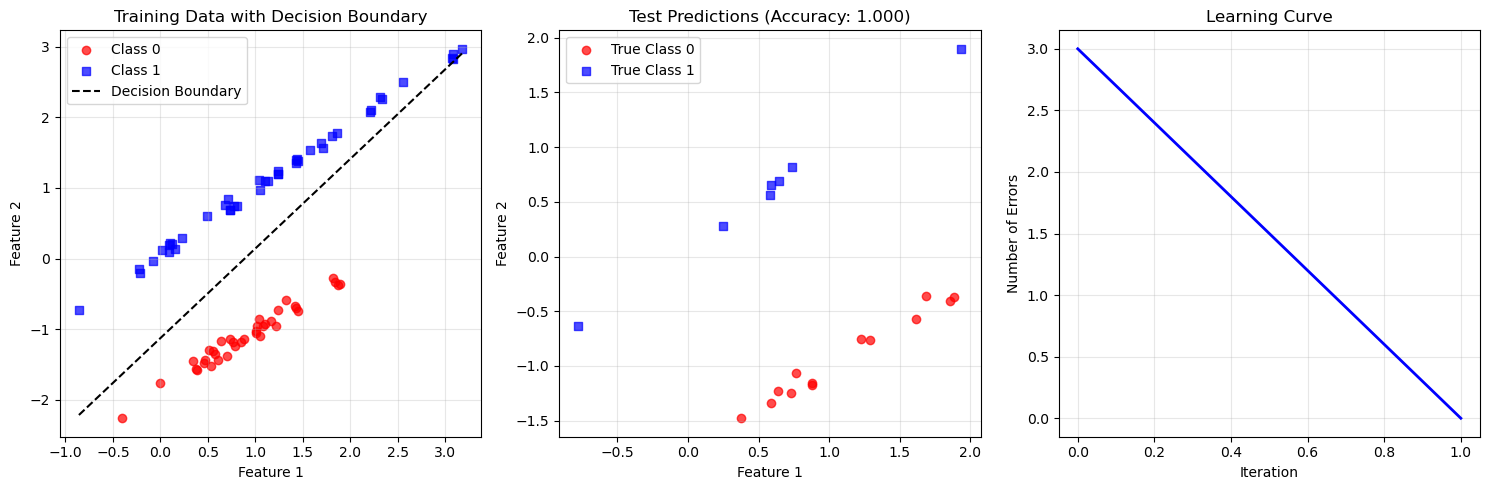


Final Weights: [-0.11272994  0.08875469]
Final Bias: 0.100


In [11]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Plot 1: Training data with decision boundary
plt.subplot(1, 3, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', marker='o', label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', marker='s', label='Class 1', alpha=0.7)

# Plot decision boundary (if weights are learned)
if perceptron.weights is not None:
    x_boundary = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    # Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
    if perceptron.weights[1] != 0:
        y_boundary = -(perceptron.weights[0] * x_boundary + perceptron.bias) / perceptron.weights[1]
        plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data with Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test predictions
plt.subplot(1, 3, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='red', marker='o', label='True Class 0', alpha=0.7)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='blue', marker='s', label='True Class 1', alpha=0.7)

# Highlight misclassified points
if test_predictions is not None:
    misclassified = y_test != test_predictions
    if np.any(misclassified):
        plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1], 
                   facecolors='none', edgecolors='black', s=100, linewidth=2, label='Misclassified')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Test Predictions (Accuracy: {test_accuracy:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Learning curve (errors over iterations)
plt.subplot(1, 3, 3)
plt.plot(perceptron.errors, 'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors')
plt.title('Learning Curve')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final weights and bias
if perceptron.weights is not None:
    print(f"\nFinal Weights: {perceptron.weights}")
    print(f"Final Bias: {perceptron.bias:.3f}")

---

## Test on Real Dataset: Iris Dataset

Now let's test your perceptron on a real dataset. We'll use the famous Iris dataset, but only two classes to keep it binary.

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X_iris = iris.data[:100, :2]  # First 100 samples, first 2 features (sepal length, width)
y_iris = iris.target[:100]    # First 100 labels (setosa=0, versicolor=1)

# Standardize features (important for perceptron)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Split the data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_scaled, y_iris, test_size=0.2, random_state=42
)

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Classes: {iris.target_names[:2]}")
print(f"Feature names: {iris.feature_names[:2]}")

Iris dataset shape: (100, 2)
Classes: ['setosa' 'versicolor']
Feature names: ['sepal length (cm)', 'sepal width (cm)']


Converged after 4 iterations
Iris Training Accuracy: 1.000
Iris Test Accuracy: 1.000


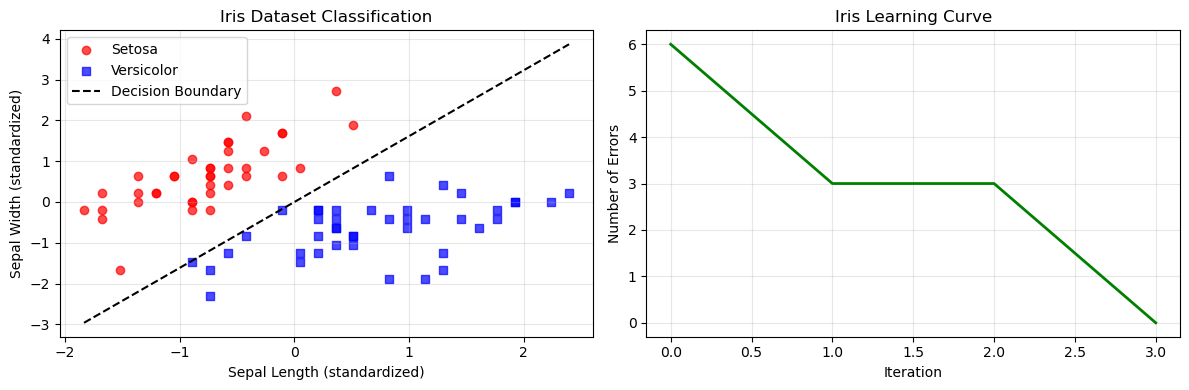

In [13]:
# Train perceptron on Iris data
perceptron_iris = Perceptron(learning_rate=0.1, max_iterations=1000)
perceptron_iris.fit(X_train_iris, y_train_iris)

# Evaluate performance
train_acc_iris = perceptron_iris.score(X_train_iris, y_train_iris)
test_acc_iris = perceptron_iris.score(X_test_iris, y_test_iris)

print(f"Iris Training Accuracy: {train_acc_iris:.3f}")
print(f"Iris Test Accuracy: {test_acc_iris:.3f}")

# Visualize Iris results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train_iris[y_train_iris == 0, 0], X_train_iris[y_train_iris == 0, 1], 
           c='red', marker='o', label='Setosa', alpha=0.7)
plt.scatter(X_train_iris[y_train_iris == 1, 0], X_train_iris[y_train_iris == 1, 1], 
           c='blue', marker='s', label='Versicolor', alpha=0.7)

# Decision boundary
x_boundary = np.linspace(X_train_iris[:, 0].min(), X_train_iris[:, 0].max(), 100)
if perceptron_iris.weights[1] != 0:
    y_boundary = -(perceptron_iris.weights[0] * x_boundary + perceptron_iris.bias) / perceptron_iris.weights[1]
    plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Iris Dataset Classification')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(perceptron_iris.errors, 'g-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors')
plt.title('Iris Learning Curve')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Experiment: Effect of Learning Rate

Run this experiment to see how different learning rates affect convergence.

Converged after 3 iterations
Converged after 2 iterations
Converged after 2 iterations
Converged after 2 iterations


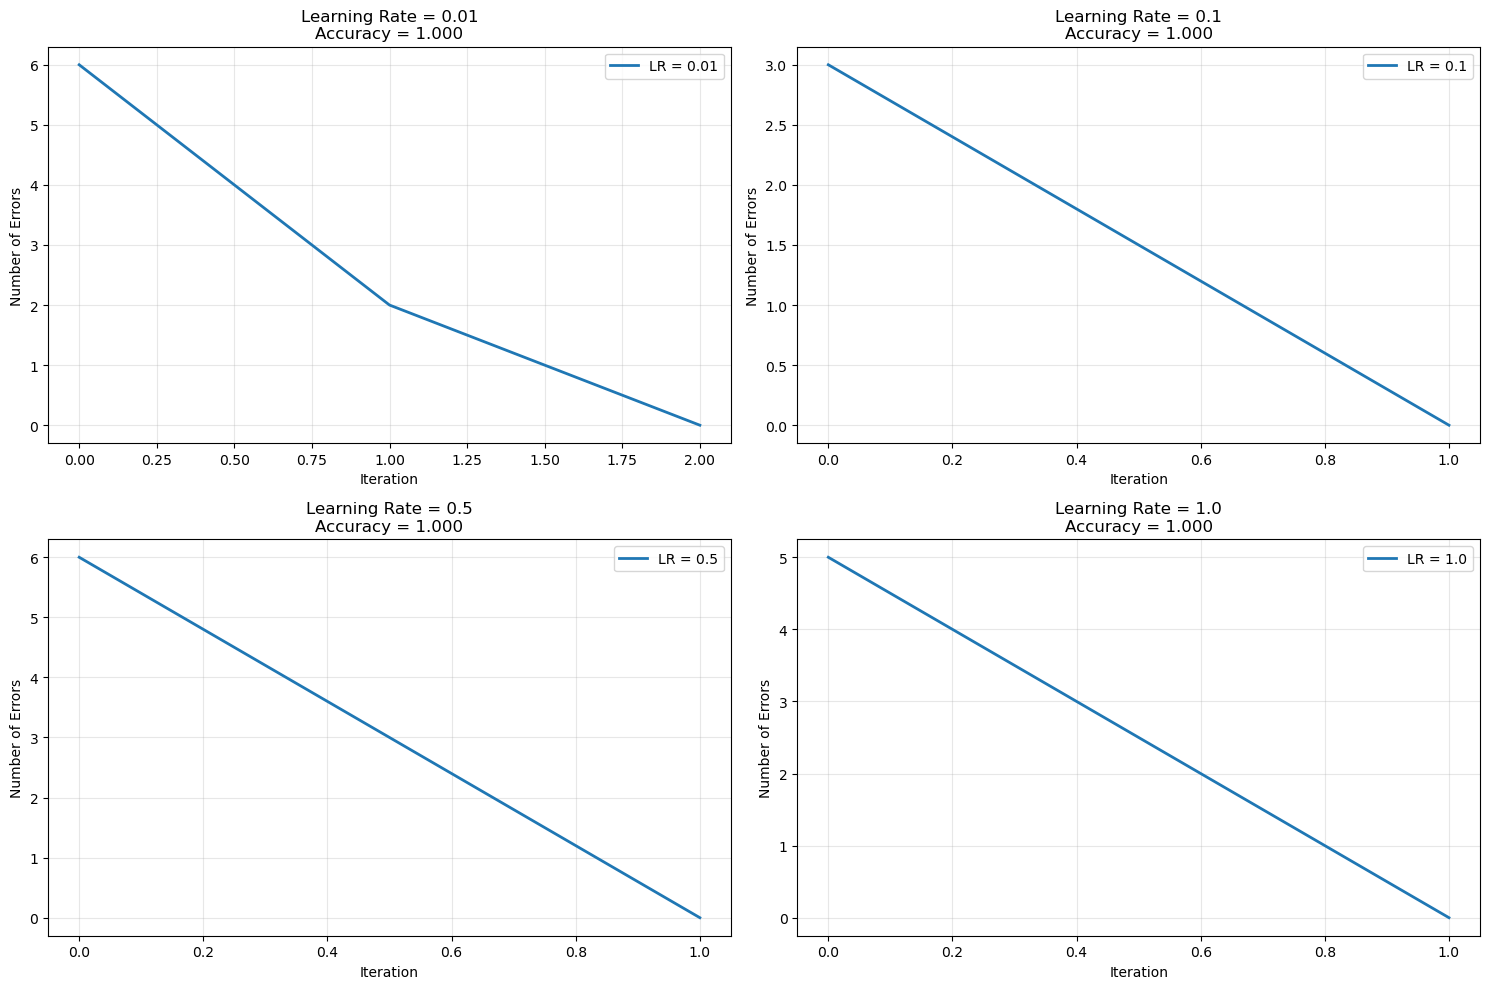


Learning Rate Comparison:
----------------------------------------
LR = 0.01: Accuracy = 1.000, Iterations = 3
LR = 0.10: Accuracy = 1.000, Iterations = 2
LR = 0.50: Accuracy = 1.000, Iterations = 2
LR = 1.00: Accuracy = 1.000, Iterations = 2


In [14]:
# Test different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.0]
results = {}

plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates, 1):
    perceptron_lr = Perceptron(learning_rate=lr, max_iterations=100)
    perceptron_lr.fit(X_train, y_train)
    
    accuracy = perceptron_lr.score(X_test, y_test)
    results[lr] = {
        'accuracy': accuracy,
        'iterations': len(perceptron_lr.errors),
        'errors': perceptron_lr.errors
    }
    
    # Plot learning curve
    plt.subplot(2, 2, i)
    plt.plot(perceptron_lr.errors, linewidth=2, label=f'LR = {lr}')
    plt.xlabel('Iteration')
    plt.ylabel('Number of Errors')
    plt.title(f'Learning Rate = {lr}\nAccuracy = {accuracy:.3f}')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

# Print summary
print("\nLearning Rate Comparison:")
print("-" * 40)
for lr, result in results.items():
    print(f"LR = {lr:4.2f}: Accuracy = {result['accuracy']:.3f}, Iterations = {result['iterations']}")

---

## Discussion Questions

After completing the implementation and running the experiments, discuss:

1. **Convergence**: Why did the perceptron converge quickly on some datasets but not others?

2. **Learning Rate**: How does the learning rate affect:
   - Speed of convergence?
   - Final accuracy?
   - Stability of learning?

3. **Linear Separability**: What happens if the data is not linearly separable? Try creating a dataset with overlapping classes.

4. **Feature Scaling**: Why was standardization important for the Iris dataset?

5. **Comparison**: How might this compare to more modern algorithms like Support Vector Machines or Neural Networks?

---

## Next Steps

- Implement the **Pocket Algorithm** for non-separable data
- Try **multi-class classification** using one-vs-all strategy
- Explore the connection to **gradient descent** and **neural networks**
- Compare with **sklearn's Perceptron** implementation